In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import numpy as np
from sklearn.preprocessing import StandardScaler

In [7]:
orders = pd.read_csv('orders.csv')
orders.dropna(subset=['order_approved_at','order_delivered_timestamp'],inplace=True)

# 데이터 형식 바꾸기
orders['order_purchase_timestamp'] = pd.to_datetime(orders['order_purchase_timestamp'], errors = 'coerce')
orders['order_approved_at'] = pd.to_datetime(orders['order_approved_at'], errors = 'coerce')
orders['order_delivered_timestamp'] = pd.to_datetime(orders['order_delivered_timestamp'], errors = 'coerce')
orders['order_estimated_delivery_date'] = pd.to_datetime(orders['order_estimated_delivery_date'], errors = 'coerce')


# 날짜 데이터 이상치확인
# 역방향이면 이상치로 의심
Check_date_outliers = orders[
    (orders['order_purchase_timestamp'] > orders['order_approved_at']) |
    (orders['order_approved_at'] > orders['order_delivered_timestamp'])
]

#이상치 개수 확인
print(len(Check_date_outliers))

61


In [8]:
out_ids = Check_date_outliers['order_id'].unique().tolist()
out_ids[:5]

['58d4c4747ee059eeeb865b349b41f53a',
 '4df92d82d79c3b52c7138679fa9b07fc',
 '6e57e23ecac1ae881286657694444267',
 'f222c56f035b47dfa1e069a88235d730',
 'cf72398d0690f841271b695bbfda82d2']

In [9]:
data_cleaned_df = pd.read_csv('capstone_data_cleaned.csv')
data_cleaned_df.T

,0,1,2,3,4,5,6,7,8,9,...,119604,119605,119606,119607,119608,119609,119610,119611,119612,119613
order_id,e481f51cbdc54678b7cc49136f2d6af7,e481f51cbdc54678b7cc49136f2d6af7,e481f51cbdc54678b7cc49136f2d6af7,e481f51cbdc54678b7cc49136f2d6af7,e481f51cbdc54678b7cc49136f2d6af7,e481f51cbdc54678b7cc49136f2d6af7,69923a4e07ce446644394df37a710286,69923a4e07ce446644394df37a710286,128e10d95713541c87cd1a2e48201934,0e7e841ddf8f8f2de2bad69267ecfbcf,...,9b7fd5b0ef330dcbbb6397e5971faeec,aa07fc0f496d65986abc9044683b8800,5597332b7eded552f104108f22b023e4,add4f182072426430ee6c993eab97efe,87b4c933f31145a28413b39d880ad6c3,e8fd20068b9f7e6ec07068bb7537f781,e8fd20068b9f7e6ec07068bb7537f781,cfa78b997e329a5295b4ee6972c02979,9c5dedf39a927c1b2549525ed64a053c,66dea50a8b16d9b4dee7af250b4be1a5
customer_id,7c396fd4830fd04220f754e42b4e5bff,7c396fd4830fd04220f754e42b4e5bff,7c396fd4830fd04220f754e42b4e5bff,7c396fd4830fd04220f754e42b4e5bff,7c396fd4830fd04220f754e42b4e5bff,7c396fd4830fd04220f754e42b4e5bff,7c396fd4830fd04220f754e42b4e5bff,7c396fd4830fd04220f754e42b4e5bff,3a51803cc0d012c3b5dc8b7528cb05f7,ef0996a1a279c26e7ecbd737be23d235,...,45265f9d6c53836d632f904a3c1d0f1c,0b940c9e78e70637166bf09d0629dca2,8a898880a61e551c80bacadfb4356255,4515b05f3788bb7a5e66e63457aaf6ce,490c3c53ca927221bccbb00706afbcf9,fb9310710003399b031add3e55f34719,fb9310710003399b031add3e55f34719,a49e8e11e850592fe685ae3c64b40eca,6359f309b166b0196dbf7ad2ac62bb5a,60350aa974b26ff12caad89e55993bd6
order_purchase_timestamp,10/2/2017 10:56,10/2/2017 10:56,10/2/2017 10:56,10/2/2017 10:56,10/2/2017 10:56,10/2/2017 10:56,9/4/2017 11:26,9/4/2017 11:26,8/15/2017 18:29,8/2/2017 18:24,...,5/17/2017 15:48,8/19/2017 18:28,8/15/2018 13:03,1/24/2018 2:23,3/2/2018 17:12,8/10/2017 21:21,8/10/2017 21:21,12/20/2017 9:52,3/9/2017 9:54,3/8/2018 20:57
order_approved_at,10/2/2017 11:07,10/2/2017 11:07,10/2/2017 11:07,10/2/2017 11:07,10/2/2017 11:07,10/2/2017 11:07,9/4/2017 11:43,9/4/2017 11:43,8/15/2017 20:05,8/2/2017 18:43,...,5/17/2017 16:15,8/19/2017 18:44,8/15/2018 13:15,1/25/2018 2:58,3/2/2018 17:49,8/10/2017 21:35,8/10/2017 21:35,12/20/2017 10:09,3/9/2017 9:54,3/9/2018 11:20
order_delivered_timestamp,10/10/2017 21:25,10/10/2017 21:25,10/10/2017 21:25,10/10/2017 21:25,10/10/2017 21:25,10/10/2017 21:25,9/5/2017 19:20,9/5/2017 19:20,8/18/2017 14:44,8/7/2017 18:30,...,5/29/2017 15:18,8/25/2017 16:05,8/17/2018 16:06,1/29/2018 23:33,3/16/2018 17:21,8/23/2017 15:36,8/23/2017 15:36,1/26/2018 15:45,3/17/2017 15:08,3/16/2018 13:08
order_estimated_delivery_date,10/18/2017 0:00,10/18/2017 0:00,10/18/2017 0:00,10/18/2017 0:00,10/18/2017 0:00,10/18/2017 0:00,9/15/2017 0:00,9/15/2017 0:00,8/28/2017 0:00,8/15/2017 0:00,...,6/8/2017 0:00,9/21/2017 0:00,8/21/2018 0:00,2/8/2018 0:00,3/21/2018 0:00,8/31/2017 0:00,8/31/2017 0:00,1/18/2018 0:00,3/28/2017 0:00,4/3/2018 0:00
order_item_id,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,2,1,1,1
product_id,87285b34884572647811a353c7ac498a,87285b34884572647811a353c7ac498a,87285b34884572647811a353c7ac498a,87285b34884572647811a353c7ac498a,87285b34884572647811a353c7ac498a,87285b34884572647811a353c7ac498a,9abb00920aae319ef9eba674b7d2e6ff,9abb00920aae319ef9eba674b7d2e6ff,87285b34884572647811a353c7ac498a,87285b34884572647811a353c7ac498a,...,afb83a05bfcf46258f04ce060671d5b4,77feb885b9ca6c9b64934b33e3c0e15e,6db72cc3d861dbea370e6959aa850b8c,e68ede48908dfec1ba4abbcdb86b420f,cbaf5898b92064cd5e399c7cff291d0a,0df37da38a30a713453b03053d60d3f7,0df37da38a30a713453b03053d60d3f7,3d2c44374ee42b3003a470f3e937a2ea,ac35486adb7b02598c182c2ff2e05254,006619bbed68b000c8ba3f8725d5409e
seller_id,3504c0cb71d7fa48d967e0e4c94d59d9,3504c0cb71d7fa48d967e0e4c94d59d9,3504c0cb71d7fa48d967e0e4c94d59d9,3504c0cb71d7fa48d967e0e4c94d59d9,3504c0cb71d7fa48d967e0e4c94d59d9,3504c0cb71d7fa48d967e0e4c94d59d9,1771297ac436903d1dd6b0e9279aa505,1771297ac436903d1dd6b0e9279aa505,3504c0cb71d7fa48d967e0e4c94d59d9,3504c0cb71d7fa48d967e0e4c94d59d9,...,e2aee0892199b1d92530e371abd825bf,2f73e04d12cdf0c945ded66bb3fcf6c7,31561f325664a8a7aba4c8d0c3a9b3db,fa1c13f2614d7b

In [10]:
pd.__version__

'2.2.2'

In [11]:
#item_id, customer_zip_code_prefix 숫자에서 문자열로 변경

data_cleaned_df['order_item_id'] = data_cleaned_df['order_item_id'].astype(str)
data_cleaned_df['customer_zip_code_prefix'] = data_cleaned_df['customer_zip_code_prefix'].astype(str)

# to_datetime
data_cleaned_df['order_purchase_timestamp'] = pd.to_datetime(data_cleaned_df['order_purchase_timestamp'])
data_cleaned_df['order_delivered_timestamp'] = pd.to_datetime(data_cleaned_df['order_delivered_timestamp'])
data_cleaned_df['order_approved_at']=pd.to_datetime(data_cleaned_df['order_approved_at'])
data_cleaned_df['order_estimated_delivery_date'] = pd.to_datetime(data_cleaned_df['order_estimated_delivery_date'])

# payment
data_cleaned_df['total_payment'] = data_cleaned_df['price'] + data_cleaned_df['shipping_charges']

# volume
data_cleaned_df['volume'] = data_cleaned_df['product_height_cm'] * data_cleaned_df['product_length_cm'] * data_cleaned_df['product_width_cm']

# 안 쓰는 행 삭제
columns_to_remove = ['order_estimated_delivery_date', 'shipping_charges', 'price', 'payment_value','customer_city','order_approved_at']

retail_df = data_cleaned_df.drop(columns=columns_to_remove)

In [12]:
list1 = []
for i in retail_df.columns.tolist():
    if i not in columns_to_remove:
        list1.append(i)
list1

['order_id',
 'customer_id',
 'order_purchase_timestamp',
 'order_delivered_timestamp',
 'order_item_id',
 'product_id',
 'seller_id',
 'payment_type',
 'payment_installments',
 'product_category_name',
 'product_weight_g',
 'product_length_cm',
 'product_height_cm',
 'product_width_cm',
 'customer_zip_code_prefix',
 'customer_state',
 'total_payment',
 'volume']

In [13]:
retail_df.T

,0,1,2,3,4,5,6,7,8,9,...,119604,119605,119606,119607,119608,119609,119610,119611,119612,119613
order_id,e481f51cbdc54678b7cc49136f2d6af7,e481f51cbdc54678b7cc49136f2d6af7,e481f51cbdc54678b7cc49136f2d6af7,e481f51cbdc54678b7cc49136f2d6af7,e481f51cbdc54678b7cc49136f2d6af7,e481f51cbdc54678b7cc49136f2d6af7,69923a4e07ce446644394df37a710286,69923a4e07ce446644394df37a710286,128e10d95713541c87cd1a2e48201934,0e7e841ddf8f8f2de2bad69267ecfbcf,...,9b7fd5b0ef330dcbbb6397e5971faeec,aa07fc0f496d65986abc9044683b8800,5597332b7eded552f104108f22b023e4,add4f182072426430ee6c993eab97efe,87b4c933f31145a28413b39d880ad6c3,e8fd20068b9f7e6ec07068bb7537f781,e8fd20068b9f7e6ec07068bb7537f781,cfa78b997e329a5295b4ee6972c02979,9c5dedf39a927c1b2549525ed64a053c,66dea50a8b16d9b4dee7af250b4be1a5
customer_id,7c396fd4830fd04220f754e42b4e5bff,7c396fd4830fd04220f754e42b4e5bff,7c396fd4830fd04220f754e42b4e5bff,7c396fd4830fd04220f754e42b4e5bff,7c396fd4830fd04220f754e42b4e5bff,7c396fd4830fd04220f754e42b4e5bff,7c396fd4830fd04220f754e42b4e5bff,7c396fd4830fd04220f754e42b4e5bff,3a51803cc0d012c3b5dc8b7528cb05f7,ef0996a1a279c26e7ecbd737be23d235,...,45265f9d6c53836d632f904a3c1d0f1c,0b940c9e78e70637166bf09d0629dca2,8a898880a61e551c80bacadfb4356255,4515b05f3788bb7a5e66e63457aaf6ce,490c3c53ca927221bccbb00706afbcf9,fb9310710003399b031add3e55f34719,fb9310710003399b031add3e55f34719,a49e8e11e850592fe685ae3c64b40eca,6359f309b166b0196dbf7ad2ac62bb5a,60350aa974b26ff12caad89e55993bd6
order_purchase_timestamp,2017-10-02 10:56:00,2017-10-02 10:56:00,2017-10-02 10:56:00,2017-10-02 10:56:00,2017-10-02 10:56:00,2017-10-02 10:56:00,2017-09-04 11:26:00,2017-09-04 11:26:00,2017-08-15 18:29:00,2017-08-02 18:24:00,...,2017-05-17 15:48:00,2017-08-19 18:28:00,2018-08-15 13:03:00,2018-01-24 02:23:00,2018-03-02 17:12:00,2017-08-10 21:21:00,2017-08-10 21:21:00,2017-12-20 09:52:00,2017-03-09 09:54:00,2018-03-08 20:57:00
order_delivered_timestamp,2017-10-10 21:25:00,2017-10-10 21:25:00,2017-10-10 21:25:00,2017-10-10 21:25:00,2017-10-10 21:25:00,2017-10-10 21:25:00,2017-09-05 19:20:00,2017-09-05 19:20:00,2017-08-18 14:44:00,2017-08-07 18:30:00,...,2017-05-29 15:18:00,2017-08-25 16:05:00,2018-08-17 16:06:00,2018-01-29 23:33:00,2018-03-16 17:21:00,2017-08-23 15:36:00,2017-08-23 15:36:00,2018-01-26 15:45:00,2017-03-17 15:08:00,2018-03-16 13:08:00
order_item_id,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,2,1,1,1
product_id,87285b34884572647811a353c7ac498a,87285b34884572647811a353c7ac498a,87285b34884572647811a353c7ac498a,87285b34884572647811a353c7ac498a,87285b34884572647811a353c7ac498a,87285b34884572647811a353c7ac498a,9abb00920aae319ef9eba674b7d2e6ff,9abb00920aae319ef9eba674b7d2e6ff,87285b34884572647811a353c7ac498a,87285b34884572647811a353c7ac498a,...,afb83a05bfcf46258f04ce060671d5b4,77feb885b9ca6c9b64934b33e3c0e15e,6db72cc3d861dbea370e6959aa850b8c,e68ede48908dfec1ba4abbcdb86b420f,cbaf5898b92064cd5e399c7cff291d0a,0df37da38a30a713453b03053d60d3f7,0df37da38a30a713453b03053d60d3f7,3d2c44374ee42b3003a470f3e937a2ea,ac35486adb7b02598c182c2ff2e05254,006619bbed68b000c8ba3f8725d5409e
seller_id,3504c0cb71d7fa48d967e0e4c94d59d9,3504c0cb71d7fa48d967e0e4c94d59d9,3504c0cb71d7fa48d967e0e4c94d59d9,3504c0cb71d7fa48d967e0e4c94d59d9,3504c0cb71d7fa48d967e0e4c94d59d9,3504c0cb71d7fa48d967e0e4c94d59d9,1771297ac436903d1dd6b0e9279aa505,1771297ac436903d1dd6b0e9279aa505,3504c0cb71d7fa48d967e0e4c94d59d9,3504c0cb71d7fa48d967e0e4c94d59d9,...,e2aee0892199b1d92530e371abd825bf,2f73e04d12cdf0c945ded66bb3fcf6c7,31561f325664a8a7aba4c8d0c3a9b3db,fa1c13f2614d7b5c4749cbc52fecda94,06a2c3af7b3aee5d69171b0e14f0ee87,218d46b86c1881d022bce9c68a7d4b15,218d46b86c1881d022bce9c68a7d4b15,ce248b21cb2adc36282ede306b7660e5,e24fc9fcd865784fb25705606fe3dfe7,ececbfcff9804a2d6b40f589df8eef2b
payment_type,credit_card,credit_card,voucher,voucher,voucher,voucher,credit_card,credit_card,credit_card,credit_card,...,credit_card,credit_card,credit_card,wallet,credit_card,credit_card,credit_card,credit_card,credit_card,debit_card
payment_installments,1,1,1,1,1,1,1,1,3,1,...,1,3,1,1,1,

In [14]:
retail_df['product_category_name'].unique()

array(['housewares', 'baby', 'toys', 'audio', 'furniture_decor',
       'bed_bath_table', 'health_beauty', 'computers_accessories',
       'watches_gifts', 'electronics', 'air_conditioning',
       'sports_leisure', 'stationery', 'garden_tools',
       'construction_tools_construction', 'small_appliances', 'telephony',
       'luggage_accessories', 'construction_tools_safety', 'perfumery',
       'home_appliances_2', 'office_furniture', 'home_construction',
       'fashion_underwear_beach', 'musical_instruments', 'pet_shop',
       'costruction_tools_garden', 'cool_stuff', 'home_appliances',
       'auto', 'market_place', 'home_confort', 'party_supplies',
       'industry_commerce_and_business', 'fashion_bags_accessories',
       'fashion_shoes', 'fixed_telephony', 'books_general_interest',
       'consoles_games', 'furniture_living_room',
       'kitchen_dining_laundry_garden_furniture', 'food', 'drinks',
       'construction_tools_lights', 'christmas_supplies',
       'tablets_printi

In [15]:
electronics =  [
        "audio", "computers_accessories", "electronics", 
        "telephony", "tablets_printing_image", "computers", "cine_photo",  
        "dvds_blu_ray", "fixed_telephony","consoles_games"]


food = ["food", "drinks", "food_drink", "la_cuisine"]


toys = ["toys"]

home_appliances =[ "home_appliances", "home_appliances_2" ]

furniture = [
        "housewares", "furniture_decor", "bed_bath_table",
        "kitchen_dining_laundry_garden_furniture", 
        "furniture_living_room", "furniture_bedroom",
        "furniture_mattress_and_upholstery", "home_confort", "home_comfort_2", 
        "office_furniture"]

construction = ["costruction_tools_tools", "construction_tools_lights","construction_tools_safety", "home_construction", "construction_tools_construction"]

fashion_beauty = [
        "fashion_bags_accessories", "fashion_shoes", "fashion_male_clothing", "watches_gifts",
        "fashio_female_clothing", "fashion_childrens_clothes", 
        "fashion_underwear_beach", "fashion_sport","cool_stuff", "health_beauty", "perfumery","luggage_accessories","sports_leisure"
    ]

baby_products = [ "baby","diapers_and_hygiene"]

arts_hobbies =  [ "art", "arts_and_craftmanship", "music", "musical_instruments", 
                "books_general_interest", "books_technical", "books_imported", 
        "christmas_supplies", "stationery", "party_supplies","garden_tools","flowers","costruction_tools_garden"]

industry = ["industry_commerce_and_business", "agro_industry_and_commerce", "market_place"]

security = ["signaling_and_security", "security_and_services" ]
others = ["pet_shop","auto"]


In [16]:
def categorize_product(row):
    if row in electronics:
        return 'electronics'
    elif row in food:
        return 'food'
    elif row in toys:
        return 'toys'
    elif row in home_appliances:
        return 'home_appliances'
    elif row in furniture:
        return 'furniture'
    elif row in construction:
        return 'construction'
    elif row in fashion_beauty:
        return 'fashion_beauty'
    elif row in baby_products:
        return 'baby_products'
    elif row in arts_hobbies:
        return 'arts_hobbies'
    elif row in industry:
        return 'industry'
    elif row in security:
        return 'security'
    else:
        return 'others'

# retail['product_category_name'] 컬럼을 새로운 카테고리로 분류
retail_df['category'] = retail_df['product_category_name'].apply(categorize_product)
retail_df = retail_df.drop(columns='product_category_name')

In [17]:
retail_df['category'].unique()

array(['furniture', 'baby_products', 'toys', 'electronics',
       'fashion_beauty', 'others', 'arts_hobbies', 'construction',
       'home_appliances', 'industry', 'food', 'security'], dtype=object)

In [18]:
#retail = retail.drop_duplicates()
retail_df = retail_df.reset_index(drop=True)
retail_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119614 entries, 0 to 119613
Data columns (total 18 columns):
 #   Column                     Non-Null Count   Dtype         
---  ------                     --------------   -----         
 0   order_id                   119614 non-null  object        
 1   customer_id                119614 non-null  object        
 2   order_purchase_timestamp   119614 non-null  datetime64[ns]
 3   order_delivered_timestamp  119614 non-null  datetime64[ns]
 4   order_item_id              119614 non-null  object        
 5   product_id                 119614 non-null  object        
 6   seller_id                  119614 non-null  object        
 7   payment_type               119614 non-null  object        
 8   payment_installments       119614 non-null  int64         
 9   product_weight_g           119614 non-null  float64       
 10  product_length_cm          119614 non-null  float64       
 11  product_height_cm          119614 non-null  float64 

1. retail_df의 `order_id`, `payment_type` 컬럼만 뽑아서
2. `order_id` 로 그룹하고
3. id 별로 묶인`payment_type`들을 set() 에 넣어서 중복 없게 만들고
4. 위에서 만든 payment_type 순으로 정렬
5. '/'.join 으로 이어 붙임

In [19]:
payment_list = sorted(retail_df['payment_type'].unique())

# 그룹화된 payment_type을 sorted된 순서로 결합
result = (
    retail_df[['order_id', 'payment_type']]
    .groupby('order_id')['payment_type']
    .apply(lambda x: '/'.join(sorted(set(x), key=lambda y: payment_list.index(y))))
    .reset_index()
)
result

,order_id,payment_type
0,00010242fe8c5a6d1ba2dd792cb16214,credit_card
1,000229ec398224ef6ca0657da4fc703e,credit_card
2,00024acbcdf0a6daa1e931b038114c75,credit_card
3,00042b26cf59d7ce69dfabb4e55b4fd9,credit_card
4,00048cc3ae777c65dbb7d2a0634bc1ea,wallet
...,...,...
92923,fffc94f6ce00a00581880bf54a75a037,wallet
92924,fffcd46ef2263f404302a634eb57f7eb,wallet
92925,fffce4705a9662cd70adb13d4a31832d,credit_card
92926,fffe18544ffabc95dfada21779c9644f,credit_card


In [20]:
result['payment_type'].unique()

array(['credit_card', 'wallet', 'credit_card/voucher', 'debit_card',
       'voucher', 'credit_card/debit_card'], dtype=object)

In [21]:
# id 별 payment_type 테이블 완성
result

,order_id,payment_type
0,00010242fe8c5a6d1ba2dd792cb16214,credit_card
1,000229ec398224ef6ca0657da4fc703e,credit_card
2,00024acbcdf0a6daa1e931b038114c75,credit_card
3,00042b26cf59d7ce69dfabb4e55b4fd9,credit_card
4,00048cc3ae777c65dbb7d2a0634bc1ea,wallet
...,...,...
92923,fffc94f6ce00a00581880bf54a75a037,wallet
92924,fffcd46ef2263f404302a634eb57f7eb,wallet
92925,fffce4705a9662cd70adb13d4a31832d,credit_card
92926,fffe18544ffabc95dfada21779c9644f,credit_card


In [22]:
# retail_df 에 있는 payment_type 을 지우고 order_id로 groupby
retail_cleaned = retail_df.drop(columns='payment_type')
retail_grouped = retail_cleaned.groupby('order_id').first().reset_index()

# 아까 만든 id 별 payment_type 테이블과 join
merged_df = result.merge(retail_grouped, on='order_id', how='left')

# 결과 확인
merged_df.T

,0,1,2,3,4,5,6,7,8,9,...,92918,92919,92920,92921,92922,92923,92924,92925,92926,92927
order_id,00010242fe8c5a6d1ba2dd792cb16214,000229ec398224ef6ca0657da4fc703e,00024acbcdf0a6daa1e931b038114c75,00042b26cf59d7ce69dfabb4e55b4fd9,00048cc3ae777c65dbb7d2a0634bc1ea,00054e8431b9d7675808bcb819fb4a32,000576fe39319847cbb9d288c5617fa6,0005a1a1728c9d785b8e2b08b904576c,0005f50442cb953dcd1d21e1fb923495,00061f2a7bc09da83e415a52dc8a4af1,...,fffa82886406ccf10c7b4e35c4ff2788,fffb0b1a50e65c449020434fa835e078,fffb2ef8874127f75b52b643880fd7e0,fffb9224b6fc7c43ebb0904318b10b5f,fffbee3b5462987e66fb49b1c5411df2,fffc94f6ce00a00581880bf54a75a037,fffcd46ef2263f404302a634eb57f7eb,fffce4705a9662cd70adb13d4a31832d,fffe18544ffabc95dfada21779c9644f,fffe41c64501cc87c801fd61db3f6244
payment_type,credit_card,credit_card,credit_card,credit_card,wallet,credit_card,credit_card,credit_card,credit_card,credit_card,...,credit_card,credit_card,wallet,wallet,credit_card,wallet,wallet,credit_card,credit_card,credit_card
customer_id,871766c5855e863f6eccc05f988b23cb,3818d81c6709e39d06b2738a8d3a2474,af861d436cfc08b2c2ddefd0ba074622,64b576fb70d441e8f1b2d7d446e483c5,85c835d128beae5b4ce8602c491bf385,635d9ac1680f03288e72ada3a1035803,fda4476abb6307ab3c415b7e6d026526,639d23421f5517f69d0c3d6e6564cf0e,0782c41380992a5a533489063df0eef6,107e6259485efac66428a56f10801f4f,...,2a3ab9bf9639491997586882c502540a,b2d2b4204f7fc4b4aeca38e3cd680a7e,6b42acb204802253acec6607ff3a9e0b,f736308cd9952b33b90b9fe94da9c8f5,ecc3d4eb9b17d2f0865d21f2abecc51c,0c9aeda10a71f369396d0c04dce13a64,0da9fe112eae0c74d3ba1fe16de0988b,cd79b407828f02fdbba457111c38e4c4,eb803377c9315b564bdedad672039306,cd76a00d8e3ca5e6ab9ed9ecb6667ac4
order_purchase_timestamp,2017-09-13 08:59:00,2018-01-14 14:33:00,2018-08-08 10:00:00,2017-02-04 13:57:00,2017-05-15 21:42:00,2017-12-10 11:53:00,2018-07-04 12:08:00,2018-03-19 18:40:00,2018-07-02 13:59:00,2018-03-24 22:16:00,...,2017-12-18 16:33:00,2017-04-12 16:35:00,2018-03-30 15:36:00,2017-10-27 16:51:00,2018-06-19 09:27:00,2018-04-23 13:57:00,2018-07-14 10:26:00,2017-10-23 17:07:00,2017-08-14 23:02:00,2018-06-09 17:00:00
order_delivered_timestamp,2017-09-20 23:43:00,2018-01-22 13:19:00,2018-08-14 13:32:00,2017-03-01 16:42:00,2017-05-22 13:44:00,2017-12-18 22:03:00,2018-07-09 14:04:00,2018-03-29 18:17:00,2018-07-04 17:28:00,2018-03-29 00:04:00,...,2018-01-08 18:23:00,2017-05-17 11:38:00,2018-04-16 16:56:00,2017-11-17 19:41:00,2018-07-05 17:51:00,2018-05-10 22:56:00,2018-07-23 20:31:00,2017-10-28 12:22:00,2017-08-16 21:59:00,2018-06-14 17:56:00
order_item_id,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
product_id,4244733e06e7ecb4970a6e2683c13e61,c777355d18b72b67abbeef9df44fd0fd,7634da152a4610f1595efa32f14722fc,ac6c3623068f30de03045865e4e10089,ef92defde845ab8450f9d70c526ef70f,8d4f2bb7e93e6710a28f34fa83ee7d28,557d850972a7d6f792fd18ae1400d9b6,310ae3c140ff94b03219ad0adc3c778f,4535b0e1091c278dfd193e5a1d63b39f,d63c1011f49d98b976c352955b1c4bea,...,bbe7651fef80287a816ead73f065fc4b,e7be84ea9462aac5e2b0b08eb35ba7f1,ebceb9726cf5c6187b48e17fe58747b0,43423cdffde7fda63d0414ed38c11a73,6f0169f259bb0ff432bfff7d829b9946,4aa6014eceb682077f9dc4bffebc05b0,32e07fd915822b0765e448c4dd74c828,72a30483855e2eafc67aee5dc2560482,9c422a519119dcad7575db5af1ba540e,350688d9dc1e75ff97be326363655e01
seller_id,48436dade18ac8b2bce089ec2a041202,5b51032eddd242adc84c38acab88f23d,9d7a1d34a5052409006425275ba1c2b4,df560393f3a51e74553ab94004ba5c87,6426d21aca402a131fc0a5d0960a3c90,7040e82f899a04d1b434b795a43b4617,5996cddab893a4652a15592fb58ab8db,a416b6a846a11724393025641d4edd5e,ba143b05f0110f0dc71ad71b4466ce92,cc419e0650a3c5ba77189a1882b7556a,...,8f2ce03f928b567e3d56181ae20ae952,36a968b544695394e4e9d7572688598f,609e1a9a6c2539919b8205cf7c4e6ff0,b1fc4f64df5a0e8b6913ab38803c57a9,213b25e6f54661939f11710a6fddb871,b8bc237ba3788b23da09c0f1f3a3288c,f3c38ab652836d21de61fb8314b69182,c3cfdc648177fdbbbb35635a37472c53,2b3e4a2a3ea8e01938cabda2a3e5cc79,f7ccf836d21b2fb1de37564105216cc1
payment_installments,2,5,2,3,1,1,10,3,1,3,...,7,1,1,1,3,1,1,3,3,1
pr

In [23]:
#deliverd_
merged_df['delivery_hours'] = (merged_df['order_delivered_timestamp'] - merged_df['order_purchase_timestamp']).dt.total_seconds() //3600  
merged_df = merged_df.drop(columns='order_delivered_timestamp')


# 가장 최근 구매 건을 기준으로 해당 아이템의 구매가 얼마나 오래 되었는지 나타내는 # Recency column 추가
max_date = max(retail_df['order_purchase_timestamp']) #최근 구매
merged_df['Diff_days'] = (max_date - merged_df['order_purchase_timestamp']).dt.days + 1
merged_df = merged_df.drop(columns='order_purchase_timestamp')
merged_df =merged_df[merged_df['Diff_days'] <= 365 ]

#Loyal: 3개월 이내 (자주 구매/활성화 고객).
#Potential: 3-6개월 (재활성화 가능성 있는 고객).
#At Risk: 6-9개월 (이탈 위험 고객).
#Lost: 9-12개월 (거의 이탈한 고객).

def diff_type(n):
    n = (n-1)//91 
    if n < 1 : 
        return 'loyal'
    elif n < 2:
        return 'potential'
    elif n < 3:
        return 'at_risk'
    else :
        return 'lost'

merged_df['Diff_type'] = merged_df['Diff_days'].apply(diff_type)
merged_df.T

,0,1,2,5,6,7,8,9,10,11,...,92916,92917,92918,92920,92921,92922,92923,92924,92925,92927
order_id,00010242fe8c5a6d1ba2dd792cb16214,000229ec398224ef6ca0657da4fc703e,00024acbcdf0a6daa1e931b038114c75,00054e8431b9d7675808bcb819fb4a32,000576fe39319847cbb9d288c5617fa6,0005a1a1728c9d785b8e2b08b904576c,0005f50442cb953dcd1d21e1fb923495,00061f2a7bc09da83e415a52dc8a4af1,00063b381e2406b52ad429470734ebd5,0006ec9db01a64e59a68b2c340bf65a7,...,fff8287bbae429a99bb7e8c21d151c41,fff90cdcb3b2e6cfb397d05d562fd3fe,fffa82886406ccf10c7b4e35c4ff2788,fffb2ef8874127f75b52b643880fd7e0,fffb9224b6fc7c43ebb0904318b10b5f,fffbee3b5462987e66fb49b1c5411df2,fffc94f6ce00a00581880bf54a75a037,fffcd46ef2263f404302a634eb57f7eb,fffce4705a9662cd70adb13d4a31832d,fffe41c64501cc87c801fd61db3f6244
payment_type,credit_card,credit_card,credit_card,credit_card,credit_card,credit_card,credit_card,credit_card,credit_card,credit_card,...,credit_card,credit_card,credit_card,wallet,wallet,credit_card,wallet,wallet,credit_card,credit_card
customer_id,871766c5855e863f6eccc05f988b23cb,3818d81c6709e39d06b2738a8d3a2474,af861d436cfc08b2c2ddefd0ba074622,635d9ac1680f03288e72ada3a1035803,fda4476abb6307ab3c415b7e6d026526,639d23421f5517f69d0c3d6e6564cf0e,0782c41380992a5a533489063df0eef6,107e6259485efac66428a56f10801f4f,3fb97204945ca0c01bcf3eee6031c5f1,7ed0ea20347f67fe61d1c99fdf8556ae,...,028c09f007292c4e3a3b10d296e47987,0e1dad535a5b2359a2ff0a7d475ffb86,2a3ab9bf9639491997586882c502540a,6b42acb204802253acec6607ff3a9e0b,f736308cd9952b33b90b9fe94da9c8f5,ecc3d4eb9b17d2f0865d21f2abecc51c,0c9aeda10a71f369396d0c04dce13a64,0da9fe112eae0c74d3ba1fe16de0988b,cd79b407828f02fdbba457111c38e4c4,cd76a00d8e3ca5e6ab9ed9ecb6667ac4
order_item_id,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
product_id,4244733e06e7ecb4970a6e2683c13e61,c777355d18b72b67abbeef9df44fd0fd,7634da152a4610f1595efa32f14722fc,8d4f2bb7e93e6710a28f34fa83ee7d28,557d850972a7d6f792fd18ae1400d9b6,310ae3c140ff94b03219ad0adc3c778f,4535b0e1091c278dfd193e5a1d63b39f,d63c1011f49d98b976c352955b1c4bea,f177554ea93259a5b282f24e33f65ab6,99a4788cb24856965c36a24e339b6058,...,bee2e070c39f3dd2f6883a17a5f0da45,764292b2b0f73f77a0272be03fdd45f3,bbe7651fef80287a816ead73f065fc4b,ebceb9726cf5c6187b48e17fe58747b0,43423cdffde7fda63d0414ed38c11a73,6f0169f259bb0ff432bfff7d829b9946,4aa6014eceb682077f9dc4bffebc05b0,32e07fd915822b0765e448c4dd74c828,72a30483855e2eafc67aee5dc2560482,350688d9dc1e75ff97be326363655e01
seller_id,48436dade18ac8b2bce089ec2a041202,5b51032eddd242adc84c38acab88f23d,9d7a1d34a5052409006425275ba1c2b4,7040e82f899a04d1b434b795a43b4617,5996cddab893a4652a15592fb58ab8db,a416b6a846a11724393025641d4edd5e,ba143b05f0110f0dc71ad71b4466ce92,cc419e0650a3c5ba77189a1882b7556a,8602a61d680a10a82cceeeda0d99ea3d,4a3ca9315b744ce9f8e9374361493884,...,4e922959ae960d389249c378d1c939f5,bd23da7354813347129d751591d1a6e2,8f2ce03f928b567e3d56181ae20ae952,609e1a9a6c2539919b8205cf7c4e6ff0,b1fc4f64df5a0e8b6913ab38803c57a9,213b25e6f54661939f11710a6fddb871,b8bc237ba3788b23da09c0f1f3a3288c,f3c38ab652836d21de61fb8314b69182,c3cfdc648177fdbbbb35635a37472c53,f7ccf836d21b2fb1de37564105216cc1
payment_installments,2,5,2,1,10,3,1,3,5,4,...,4,1,7,1,1,3,1,1,3,1
product_weight_g,650.0,3050.0,200.0,200.0,13805.0,2000.0,850.0,950.0,200.0,1383.0,...,175.0,750.0,2700.0,200.0,350.0,1050.0,10150.0,8950.0,967.0,600.0
product_length_cm,28.0,33.0,16.0,27.0,35.0,30.0,29.0,35.0,16.0,50.0,...,20.0,30.0,60.0,25.0,16.0,16.0,89.0,45.0,21.0,30.0
product_height_cm,9.0,13.0,10.0,5.0,75.0,12.0,3.0,25.0,16.0,10.0,...,20.0,30.0,15.0,5.0,14.0,20.0,15.0,26.0,24.0,3.0


In [24]:
# 가로세로높이 부피로으로 통합했으니 삭제
merged_df2 = merged_df.drop(columns=['product_length_cm','product_height_cm','product_width_cm'])

In [25]:
# 'order_id' 열의 값이 out_ids에 포함된 행 삭제
merged_df2 = merged_df2[~merged_df2['order_id'].isin(out_ids)]

생각나는 가설
- 물건 형태에 따라서 구매하는 고객이 달라지려나?
- 자동차, 칼, 등등 차피 박스에 들어가는 거 아닌겨?

In [26]:
# 물건 볼륨으로 통합
merged_df2.T

,0,1,2,5,6,7,8,9,10,11,...,92916,92917,92918,92920,92921,92922,92923,92924,92925,92927
order_id,00010242fe8c5a6d1ba2dd792cb16214,000229ec398224ef6ca0657da4fc703e,00024acbcdf0a6daa1e931b038114c75,00054e8431b9d7675808bcb819fb4a32,000576fe39319847cbb9d288c5617fa6,0005a1a1728c9d785b8e2b08b904576c,0005f50442cb953dcd1d21e1fb923495,00061f2a7bc09da83e415a52dc8a4af1,00063b381e2406b52ad429470734ebd5,0006ec9db01a64e59a68b2c340bf65a7,...,fff8287bbae429a99bb7e8c21d151c41,fff90cdcb3b2e6cfb397d05d562fd3fe,fffa82886406ccf10c7b4e35c4ff2788,fffb2ef8874127f75b52b643880fd7e0,fffb9224b6fc7c43ebb0904318b10b5f,fffbee3b5462987e66fb49b1c5411df2,fffc94f6ce00a00581880bf54a75a037,fffcd46ef2263f404302a634eb57f7eb,fffce4705a9662cd70adb13d4a31832d,fffe41c64501cc87c801fd61db3f6244
payment_type,credit_card,credit_card,credit_card,credit_card,credit_card,credit_card,credit_card,credit_card,credit_card,credit_card,...,credit_card,credit_card,credit_card,wallet,wallet,credit_card,wallet,wallet,credit_card,credit_card
customer_id,871766c5855e863f6eccc05f988b23cb,3818d81c6709e39d06b2738a8d3a2474,af861d436cfc08b2c2ddefd0ba074622,635d9ac1680f03288e72ada3a1035803,fda4476abb6307ab3c415b7e6d026526,639d23421f5517f69d0c3d6e6564cf0e,0782c41380992a5a533489063df0eef6,107e6259485efac66428a56f10801f4f,3fb97204945ca0c01bcf3eee6031c5f1,7ed0ea20347f67fe61d1c99fdf8556ae,...,028c09f007292c4e3a3b10d296e47987,0e1dad535a5b2359a2ff0a7d475ffb86,2a3ab9bf9639491997586882c502540a,6b42acb204802253acec6607ff3a9e0b,f736308cd9952b33b90b9fe94da9c8f5,ecc3d4eb9b17d2f0865d21f2abecc51c,0c9aeda10a71f369396d0c04dce13a64,0da9fe112eae0c74d3ba1fe16de0988b,cd79b407828f02fdbba457111c38e4c4,cd76a00d8e3ca5e6ab9ed9ecb6667ac4
order_item_id,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
product_id,4244733e06e7ecb4970a6e2683c13e61,c777355d18b72b67abbeef9df44fd0fd,7634da152a4610f1595efa32f14722fc,8d4f2bb7e93e6710a28f34fa83ee7d28,557d850972a7d6f792fd18ae1400d9b6,310ae3c140ff94b03219ad0adc3c778f,4535b0e1091c278dfd193e5a1d63b39f,d63c1011f49d98b976c352955b1c4bea,f177554ea93259a5b282f24e33f65ab6,99a4788cb24856965c36a24e339b6058,...,bee2e070c39f3dd2f6883a17a5f0da45,764292b2b0f73f77a0272be03fdd45f3,bbe7651fef80287a816ead73f065fc4b,ebceb9726cf5c6187b48e17fe58747b0,43423cdffde7fda63d0414ed38c11a73,6f0169f259bb0ff432bfff7d829b9946,4aa6014eceb682077f9dc4bffebc05b0,32e07fd915822b0765e448c4dd74c828,72a30483855e2eafc67aee5dc2560482,350688d9dc1e75ff97be326363655e01
seller_id,48436dade18ac8b2bce089ec2a041202,5b51032eddd242adc84c38acab88f23d,9d7a1d34a5052409006425275ba1c2b4,7040e82f899a04d1b434b795a43b4617,5996cddab893a4652a15592fb58ab8db,a416b6a846a11724393025641d4edd5e,ba143b05f0110f0dc71ad71b4466ce92,cc419e0650a3c5ba77189a1882b7556a,8602a61d680a10a82cceeeda0d99ea3d,4a3ca9315b744ce9f8e9374361493884,...,4e922959ae960d389249c378d1c939f5,bd23da7354813347129d751591d1a6e2,8f2ce03f928b567e3d56181ae20ae952,609e1a9a6c2539919b8205cf7c4e6ff0,b1fc4f64df5a0e8b6913ab38803c57a9,213b25e6f54661939f11710a6fddb871,b8bc237ba3788b23da09c0f1f3a3288c,f3c38ab652836d21de61fb8314b69182,c3cfdc648177fdbbbb35635a37472c53,f7ccf836d21b2fb1de37564105216cc1
payment_installments,2,5,2,1,10,3,1,3,5,4,...,4,1,7,1,1,3,1,1,3,1
product_weight_g,650.0,3050.0,200.0,200.0,13805.0,2000.0,850.0,950.0,200.0,1383.0,...,175.0,750.0,2700.0,200.0,350.0,1050.0,10150.0,8950.0,967.0,600.0
customer_zip_code_prefix,28013,35661,12952,16700,11702,11075,6636,13419,15910,21810,...,58075,4119,59955,28540,56912,39401,65077,81690,4039,18605
customer_state,RJ,MG,SP,SP,SP,SP,SP,SP,SP,RJ,...,PB,SP,RN,RJ,PE,MG,MA,PR,SP,SP


In [27]:
# Let's see our data in a detailed way with pairplot
#sns.pairplot(merged_df2.drop('customer_id', axis=1), hue='category', aspect=1.5)
#plt.show()

구매 경향 알려면 두 번 이상 구매한 친구들만 빼야 하려나?

고객별 집계 정보 사용하기
customer_id를 직접적으로 사용하지 않더라도, 고객별 행동 데이터를 집계하여 더 유의미한 정보를 생성할 수 있습니다.

예: 고객 집계 정보 생성


customer_features = merged_df.groupby('customer_id').agg({
    'order_id': 'count',       # 총 구매 횟수
    'payment_value': 'mean',   # 평균 결제 금액
    'order_purchase_timestamp': 'nunique',  # 구매 날짜 수
}).reset_index()


merged_df2 = merged_df2.merge(customer_features, on='customer_id', how='left')



<Axes: xlabel='Diff_days', ylabel='Count'>

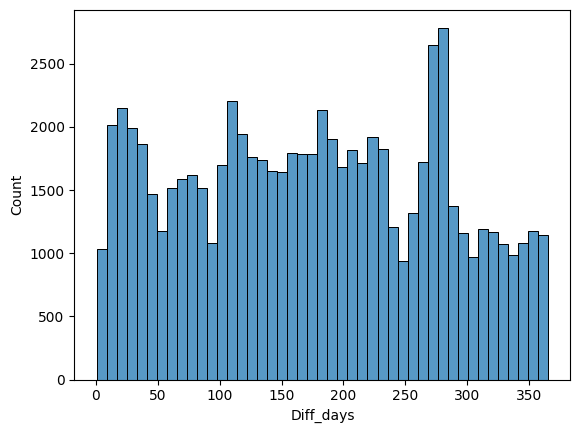

In [28]:
sns.histplot(merged_df2['Diff_days'])

In [29]:
merged_df2.columns

Index(['order_id', 'payment_type', 'customer_id', 'order_item_id',
       'product_id', 'seller_id', 'payment_installments', 'product_weight_g',
       'customer_zip_code_prefix', 'customer_state', 'total_payment', 'volume',
       'category', 'delivery_hours', 'Diff_days', 'Diff_type'],
      dtype='object')

<Axes: xlabel='Diff_days', ylabel='Count'>

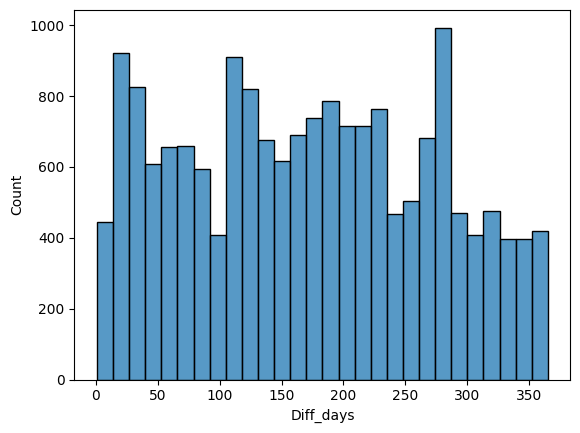

In [30]:
not_toys_df = merged_df2[merged_df2['category']!= 'toys']
sns.histplot(not_toys_df['Diff_days'])

<Axes: xlabel='Diff_days', ylabel='Count'>

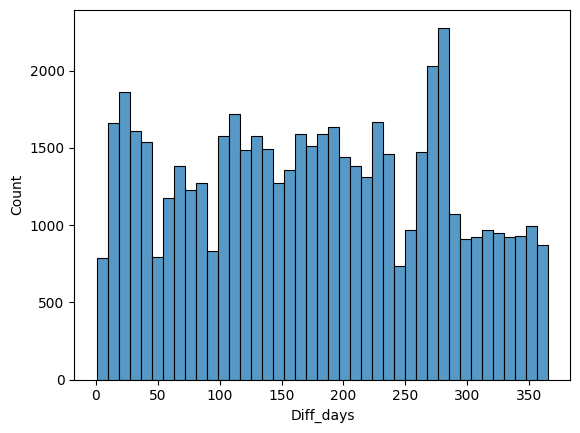

In [31]:
toys_df = merged_df2[merged_df2['category']== 'toys']
sns.histplot(toys_df['Diff_days'])

OneHotEncoder의 handle_unknown='ignore' 옵션은 입력 데이터에 훈련 시 사용되지 않은 새로운 범주(category)가 나타날 경우, 오류를 방지하고 해당 데이터를 무시하도록 설정하는 기능입니다.

In [32]:
# k 값 참고: scree plot을 통한 k 값 확인을 위한 라이브러리 import 
from yellowbrick.cluster import KElbowVisualizer
# k 값 참고: distance map 라이브러리 import 
from yellowbrick.cluster import intercluster_distance
from sklearn.cluster import MiniBatchKMeans
# k 값 참고: 실루엣 계수 확인을 위한 라이브러리 import 
from sklearn.metrics import silhouette_score



In [33]:
merged_df2.T

,0,1,2,5,6,7,8,9,10,11,...,92916,92917,92918,92920,92921,92922,92923,92924,92925,92927
order_id,00010242fe8c5a6d1ba2dd792cb16214,000229ec398224ef6ca0657da4fc703e,00024acbcdf0a6daa1e931b038114c75,00054e8431b9d7675808bcb819fb4a32,000576fe39319847cbb9d288c5617fa6,0005a1a1728c9d785b8e2b08b904576c,0005f50442cb953dcd1d21e1fb923495,00061f2a7bc09da83e415a52dc8a4af1,00063b381e2406b52ad429470734ebd5,0006ec9db01a64e59a68b2c340bf65a7,...,fff8287bbae429a99bb7e8c21d151c41,fff90cdcb3b2e6cfb397d05d562fd3fe,fffa82886406ccf10c7b4e35c4ff2788,fffb2ef8874127f75b52b643880fd7e0,fffb9224b6fc7c43ebb0904318b10b5f,fffbee3b5462987e66fb49b1c5411df2,fffc94f6ce00a00581880bf54a75a037,fffcd46ef2263f404302a634eb57f7eb,fffce4705a9662cd70adb13d4a31832d,fffe41c64501cc87c801fd61db3f6244
payment_type,credit_card,credit_card,credit_card,credit_card,credit_card,credit_card,credit_card,credit_card,credit_card,credit_card,...,credit_card,credit_card,credit_card,wallet,wallet,credit_card,wallet,wallet,credit_card,credit_card
customer_id,871766c5855e863f6eccc05f988b23cb,3818d81c6709e39d06b2738a8d3a2474,af861d436cfc08b2c2ddefd0ba074622,635d9ac1680f03288e72ada3a1035803,fda4476abb6307ab3c415b7e6d026526,639d23421f5517f69d0c3d6e6564cf0e,0782c41380992a5a533489063df0eef6,107e6259485efac66428a56f10801f4f,3fb97204945ca0c01bcf3eee6031c5f1,7ed0ea20347f67fe61d1c99fdf8556ae,...,028c09f007292c4e3a3b10d296e47987,0e1dad535a5b2359a2ff0a7d475ffb86,2a3ab9bf9639491997586882c502540a,6b42acb204802253acec6607ff3a9e0b,f736308cd9952b33b90b9fe94da9c8f5,ecc3d4eb9b17d2f0865d21f2abecc51c,0c9aeda10a71f369396d0c04dce13a64,0da9fe112eae0c74d3ba1fe16de0988b,cd79b407828f02fdbba457111c38e4c4,cd76a00d8e3ca5e6ab9ed9ecb6667ac4
order_item_id,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
product_id,4244733e06e7ecb4970a6e2683c13e61,c777355d18b72b67abbeef9df44fd0fd,7634da152a4610f1595efa32f14722fc,8d4f2bb7e93e6710a28f34fa83ee7d28,557d850972a7d6f792fd18ae1400d9b6,310ae3c140ff94b03219ad0adc3c778f,4535b0e1091c278dfd193e5a1d63b39f,d63c1011f49d98b976c352955b1c4bea,f177554ea93259a5b282f24e33f65ab6,99a4788cb24856965c36a24e339b6058,...,bee2e070c39f3dd2f6883a17a5f0da45,764292b2b0f73f77a0272be03fdd45f3,bbe7651fef80287a816ead73f065fc4b,ebceb9726cf5c6187b48e17fe58747b0,43423cdffde7fda63d0414ed38c11a73,6f0169f259bb0ff432bfff7d829b9946,4aa6014eceb682077f9dc4bffebc05b0,32e07fd915822b0765e448c4dd74c828,72a30483855e2eafc67aee5dc2560482,350688d9dc1e75ff97be326363655e01
seller_id,48436dade18ac8b2bce089ec2a041202,5b51032eddd242adc84c38acab88f23d,9d7a1d34a5052409006425275ba1c2b4,7040e82f899a04d1b434b795a43b4617,5996cddab893a4652a15592fb58ab8db,a416b6a846a11724393025641d4edd5e,ba143b05f0110f0dc71ad71b4466ce92,cc419e0650a3c5ba77189a1882b7556a,8602a61d680a10a82cceeeda0d99ea3d,4a3ca9315b744ce9f8e9374361493884,...,4e922959ae960d389249c378d1c939f5,bd23da7354813347129d751591d1a6e2,8f2ce03f928b567e3d56181ae20ae952,609e1a9a6c2539919b8205cf7c4e6ff0,b1fc4f64df5a0e8b6913ab38803c57a9,213b25e6f54661939f11710a6fddb871,b8bc237ba3788b23da09c0f1f3a3288c,f3c38ab652836d21de61fb8314b69182,c3cfdc648177fdbbbb35635a37472c53,f7ccf836d21b2fb1de37564105216cc1
payment_installments,2,5,2,1,10,3,1,3,5,4,...,4,1,7,1,1,3,1,1,3,1
product_weight_g,650.0,3050.0,200.0,200.0,13805.0,2000.0,850.0,950.0,200.0,1383.0,...,175.0,750.0,2700.0,200.0,350.0,1050.0,10150.0,8950.0,967.0,600.0
customer_zip_code_prefix,28013,35661,12952,16700,11702,11075,6636,13419,15910,21810,...,58075,4119,59955,28540,56912,39401,65077,81690,4039,18605
customer_state,RJ,MG,SP,SP,SP,SP,SP,SP,SP,RJ,...,PB,SP,RN,RJ,PE,MG,MA,PR,SP,SP


In [34]:
merged_df2.columns

Index(['order_id', 'payment_type', 'customer_id', 'order_item_id',
       'product_id', 'seller_id', 'payment_installments', 'product_weight_g',
       'customer_zip_code_prefix', 'customer_state', 'total_payment', 'volume',
       'category', 'delivery_hours', 'Diff_days', 'Diff_type'],
      dtype='object')

In [ ]:
# 클러스터링 할 컬럼 지정
feature_names = ['payment_type','product_weight_g', 'total_payment', 'volume', 'category', 'Diff_days'] 
#2.feature_names = ['product_weight_g', 'total_payment', 'volume', 'category', 'Diff_days']
#3.feature_names = ['payment_type','total_payment', 'volume', 'category', 'Diff_days']
#4.feature_names = ['payment_type','product_weight_g', 'total_payment','category', 'Diff_days']
#5.feature_names = ['payment_type','product_weight_g', 'total_payment', 'volume','Diff_days']
#6.feature_names = ['total_payment', 'volume', 'category', 'Diff_days']
#7.feature_names = ['product_weight_g', 'total_payment','category', 'Diff_days']
#8.feature_names = ['payment_type', 'total_payment', 'category', 'Diff_days']
#9.feature_names = ['payment_type', 'total_payment', 'volume', 'Diff_days']
#10.feature_names = ['payment_type','product_weight_g', 'total_payment', 'Diff_days']
#11.feature_names = ['total_payment', 'category', 'Diff_days']
#12.feature_names = ['payment_type', 'total_payment', 'Diff_days']
#벡터기반 뉴클리드 거리 ㄱ반으로 속성 6개 따오는 거니까 컬럼 6개, pCA 6개 다르다

# 지정된 컬럼으로 새로운 dataframe 생성 

from sklearn.preprocessing import OneHotEncoder

merged_df_f = pd.DataFrame(merged_df2 , columns=feature_names)

encoder = OneHotEncoder(handle_unknown='ignore', sparse_output=False)

columns_to_encode = ['payment_type', 'category']
#2.columns_to_encode = ['category']
#3.columns_to_encode = ['payment_type', 'category']
#4.columns_to_encode = ['payment_type', 'category']
#5.columns_to_encode = ['payment_type']
#6.columns_to_encode = ['category']
#7.columns_to_encode = ['category']
#8.columns_to_encode = ['payment_type', 'category']
#9.columns_to_encode = ['payment_type']
#10.columns_to_encode = ['payment_type']
#11.columns_to_encode = ['category']
#12.columns_to_encode = ['payment_type']
# 원-핫 인코딩 수행
encoded_data = encoder.fit_transform(merged_df_f[columns_to_encode])

# 원-핫 인코딩된 컬럼 이름 생성

encoded_columns = encoder.get_feature_names_out(columns_to_encode)

# 결과를 DataFrame으로 변환
encoded_df = pd.DataFrame(encoded_data, columns=encoded_columns)

# 기존 컬럼과 병합 (인코딩 제외한 나머지 컬럼 추가)
merged_result = pd.concat([merged_df_f.drop(columns=columns_to_encode).reset_index(drop=True), encoded_df], axis=1)
merged_result

,total_payment,Diff_days,payment_type_credit_card,payment_type_credit_card/debit_card,payment_type_credit_card/voucher,payment_type_debit_card,payment_type_voucher,payment_type_wallet,category_arts_hobbies,category_baby_products,category_construction,category_electronics,category_fashion_beauty,category_food,category_furniture,category_home_appliances,category_industry,category_others,category_security,category_toys
0,72.19,351,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,216.87,228,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,25.78,22,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,31.75,263,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,880.75,57,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
71989,139.88,72,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
71990,343.40,129,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
71991,386.53,47,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
71992,116.85,310,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [481]:
merged_result.T

,0,1,2,3,4,5,6,7,8,9,...,71984,71985,71986,71987,71988,71989,71990,71991,71992,71993
total_payment,72.19,216.87,25.78,31.75,880.75,157.6,65.39,68.87,57.98,97.32,...,228.14,101.73,273.92,39.96,89.19,139.88,343.4,386.53,116.85,55.79
Diff_days,351.00,228.00,22.00,263.00,57.00,163.0,59.00,158.00,33.00,36.00,...,166.00,279.00,254.00,152.00,306.00,72.00,129.0,47.00,310.00,81.00
payment_type_credit_card,1.00,1.00,1.00,1.00,1.00,1.0,1.00,1.00,1.00,1.00,...,1.00,1.00,1.00,0.00,0.00,1.00,0.0,0.00,1.00,1.00
payment_type_credit_card/debit_card,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.00
payment_type_credit_card/voucher,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.00
payment_type_debit_card,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.00
payment_type_voucher,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.00
payment_type_wallet,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,1.00,1.00,0.00,1.0,1.00,0.00,0.00
category_arts_hobbies,0.00,0.00,0.00,0.00,1.00,0.0,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.00
category_baby_products,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.00


In [482]:
from sklearn.preprocessing import StandardScaler

# 원핫 인코딩되지 않은 컬럼 선택
columns_to_scale = merged_result.columns.difference(encoded_columns)

# 스케일링 대상 데이터 추출
data_to_scale = merged_result[columns_to_scale]

# StandardScaler 초기화 및 스케일링
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data_to_scale)

# 스케일링 결과를 DataFrame으로 변환
scaled_df = pd.DataFrame(scaled_data, columns=columns_to_scale, index=merged_result.index)

# 스케일링된 데이터와 원핫 인코딩된 데이터 병합
final_result = pd.concat([scaled_df, merged_result[encoded_columns]], axis=1)

final_result.T  # 최종 결과 출력 (전치하여 확인)

#클러스터 번호 나왔을 건데. 이 데이터 프레임의 맨 마지막 컬럼에 클러스터 번호를 붙여주세요

,0,1,2,3,4,5,6,7,8,9,...,71984,71985,71986,71987,71988,71989,71990,71991,71992,71993
Diff_days,1.767165,0.536938,-1.523444,0.887002,-1.173379,-0.113183,-1.153375,-0.163192,-1.413423,-1.383418,...,-0.083177,1.047032,0.796986,-0.223203,1.317082,-1.023351,-0.453246,-1.273397,1.357089,-0.933334
total_payment,-0.470614,0.771623,-0.869094,-0.817835,6.471759,0.262725,-0.528999,-0.499119,-0.592622,-0.254845,...,0.868388,-0.216980,1.261459,-0.747343,-0.324650,0.110579,1.858021,2.228339,-0.087159,-0.611425
payment_type_credit_card,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000
payment_type_credit_card/debit_card,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
payment_type_credit_card/voucher,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
payment_type_debit_card,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
payment_type_voucher,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
payment_type_wallet,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,0.000000,0.000000
category_arts_hobbies,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
category_baby_products,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [487]:
from sklearn.decomposition import PCA

# 주성분 개수를 판단하기 위한 pca임의 시행 
pca = PCA(n_components=3)
pca.fit(final_result)

# 설정한 주성분의 갯수로 전체 데이터 분산을 얼만큼 설명 가능한지 
pca.explained_variance_ratio_.sum()

0.8242817683883623

In [ ]:
# pca 시행
pca_df = pca.fit_transform(final_result)
pca_df = pd.DataFrame(data = pca_df, columns = ['PC1','PC2','PC3','PC4','PC5','PC6']) 
#pca_df = pd.DataFrame(data = pca_df, columns = ['PC1','PC2','PC3','PC4','PC5'])
#pca_df = pd.DataFrame(data = pca_df, columns = ['PC1','PC2','PC3','PC4'])
#pca_df = pd.DataFrame(data = pca_df, columns = ['PC1','PC2','PC3'])  
#pca_df = pd.DataFrame(data = pca_df, columns = ['PC1','PC2']) 
# Show the first 5 firms
pca_df.head()

,PC1,PC2,PC3
0,-1.510179,1.016515,0.367930
1,0.233578,0.927139,0.281419
2,0.386733,-1.700987,0.339004
3,-1.181749,0.129374,0.373286
4,5.605412,3.429186,-0.052505


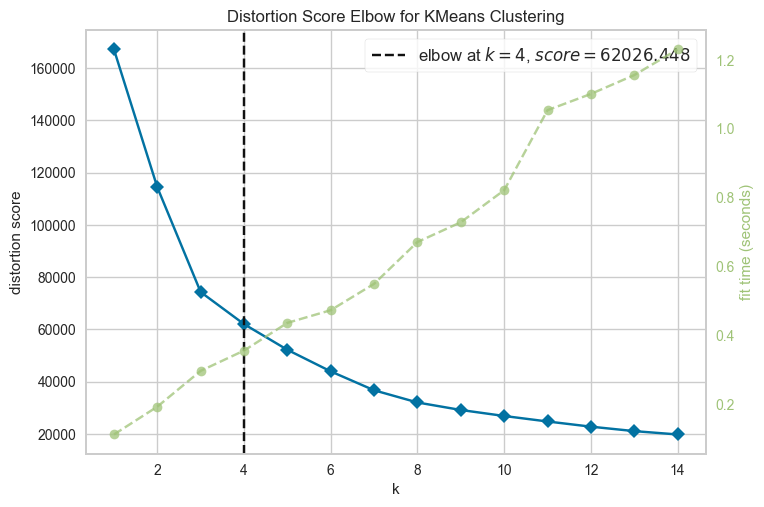

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [485]:
# k-means 알고리즘 활용을 위한 라이브러리 import 
from sklearn.cluster import KMeans
# 초기 k 값 참고를 위한 scree plot 을 그리고, 군집이 나뉘는 시간까지 고려한 k 값 확인 
model = KMeans(n_init= 20, random_state=42)

# k 값의 범위를 조정해 줄 수 있습니다. 
visualizer = KElbowVisualizer(model, k=(1,15))

# 데이터 적용
visualizer.fit(pca_df) 
visualizer.show()

c:\Users\defaultuser0\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1955: UserWarning: MiniBatchKMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can prevent it by setting batch_size >= 2560 or by setting the environment variable OMP_NUM_THREADS=4
  warnings.warn(


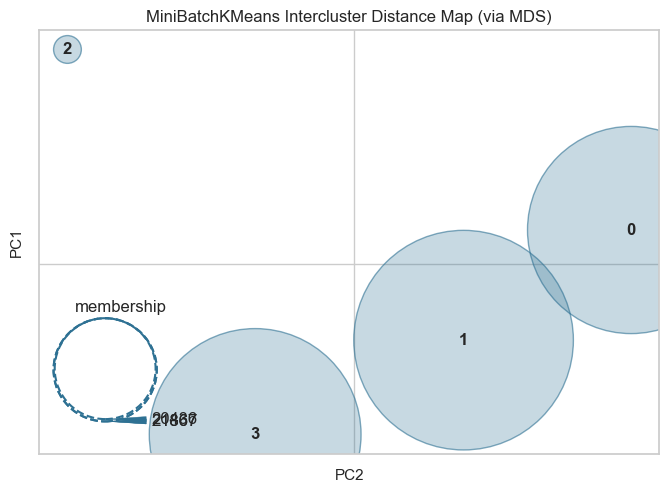

InterclusterDistance(ax=<Axes: title={'center': 'MiniBatchKMeans Intercluster Distance Map (via MDS)'}, xlabel='PC2', ylabel='PC1'>,
                     estimator=MiniBatchKMeans(n_clusters=4, random_state=42))

In [488]:
# 초기 k 값 참고를 위한 distance map 시각화
#그룹의 갯수를 지정해 줄 수 있습니다. 저는 5로 적어두었습니다. 
intercluster_distance(MiniBatchKMeans(4, random_state=42), pca_df)

In [42]:
# elbow point 바꿔보고
# 컬럼도 바꿔 보고.

In [489]:
#  KMEANS
# 군집개수(n_cluster)는 5,초기 중심 설정방식 랜덤,  
kmeans = KMeans(n_clusters=4, random_state=42, init='random')

# pca df 를 이용한 kmeans 알고리즘 적용
kmeans.fit(pca_df)

# 클러스터 번호 가져오기 
labels = kmeans.labels_

# 클러스터 번호가 할당된 데이터셋 생성
kmeans_df = pd.concat([pca_df, pd.DataFrame({'Cluster':labels})],axis = 1)

In [490]:
# 클러스터 번호가 할당된 데이터셋 생성
kmeans_df.groupby(['Cluster'])['PC1'].count().reset_index()

,Cluster,PC1
0,0,4507
1,1,26383
2,2,11313
3,3,29791


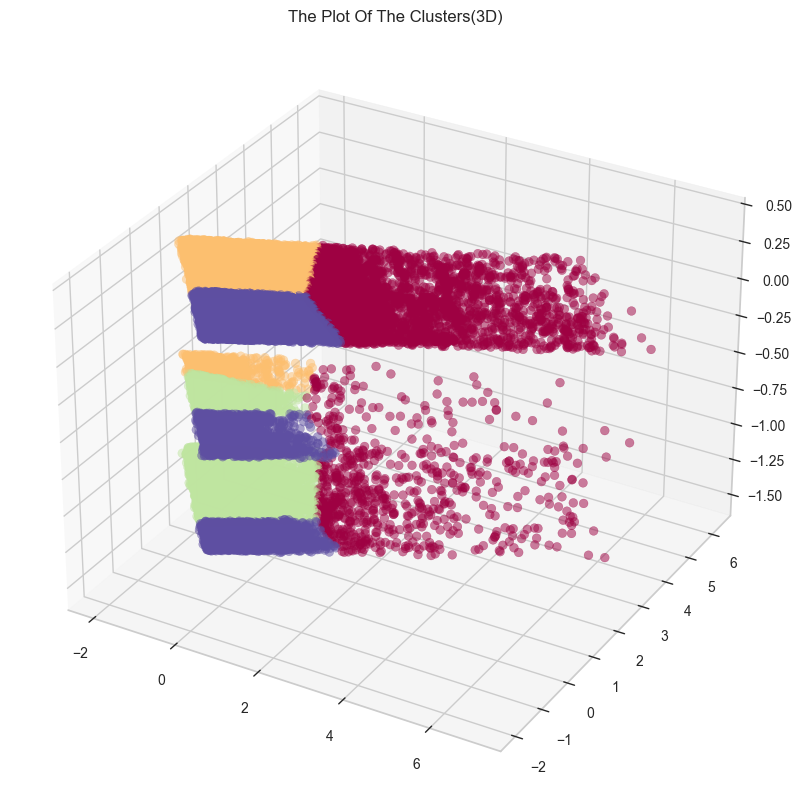

In [491]:
# 3차원으로 시각화 
x =kmeans_df["PC1"]
y =kmeans_df["PC2"]
z =kmeans_df["PC3"]

fig = plt.figure(figsize=(12,10))
ax = plt.subplot(111, projection='3d')
ax.scatter(x, y, z, s=40, c=kmeans_df["Cluster"], marker='o', alpha = 0.5, cmap = 'Spectral')
ax.set_title("The Plot Of The Clusters(3D)")

plt.show()

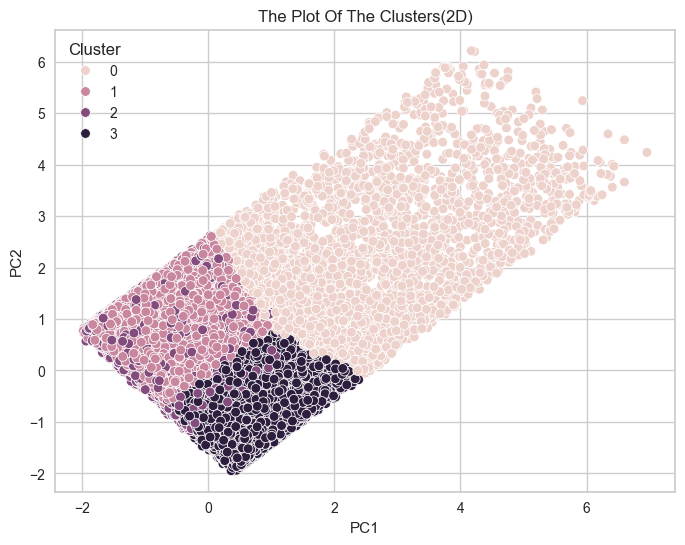

In [492]:
# 2차원으로 시각화

plt.figure(figsize=(8,6))

sns.scatterplot(data = kmeans_df, x = 'PC1', y='PC2', hue='Cluster')
plt.title('The Plot Of The Clusters(2D)')
plt.show()

In [493]:
final_result['Cluster']= kmeans.labels_
final_result

,Diff_days,total_payment,payment_type_credit_card,payment_type_credit_card/debit_card,payment_type_credit_card/voucher,payment_type_debit_card,payment_type_voucher,payment_type_wallet,category_arts_hobbies,category_baby_products,...,category_electronics,category_fashion_beauty,category_food,category_furniture,category_home_appliances,category_industry,category_others,category_security,category_toys,Cluster
0,1.767165,-0.470614,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1
1,0.536938,0.771623,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1
2,-1.523444,-0.869094,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,3
3,0.887002,-0.817835,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1
4,-1.173379,6.471759,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
71989,-1.023351,0.110579,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3
71990,-0.453246,1.858021,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0
71991,-1.273397,2.228339,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0
71992,1.357089,-0.087159,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1


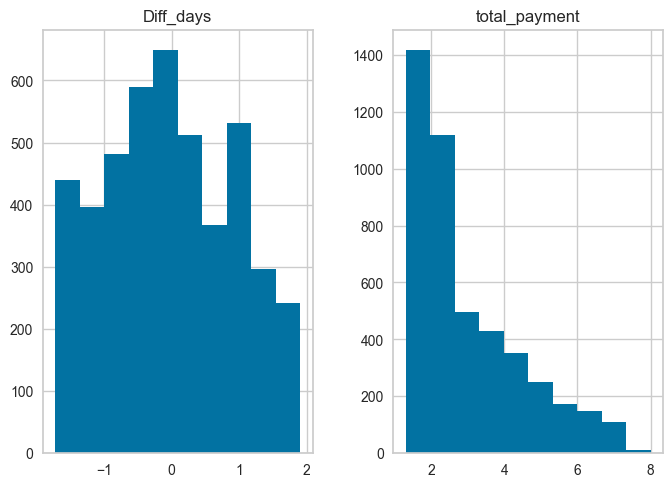

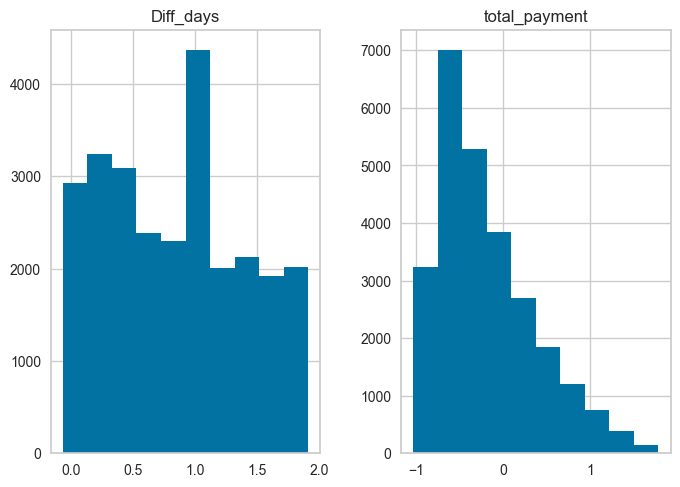

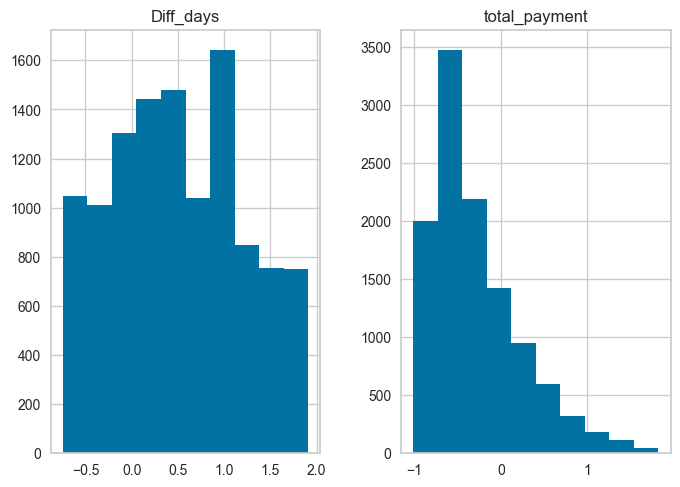

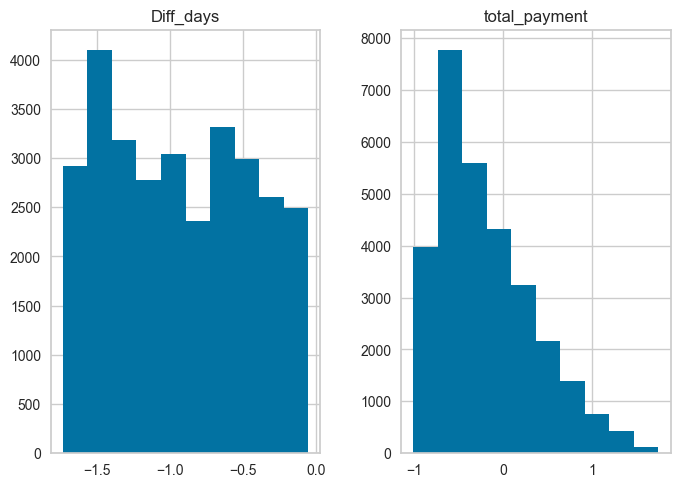

In [ ]:
final_result.groupby(['Cluster'])[['Diff_days','total_payment']].hist()
plt.show()

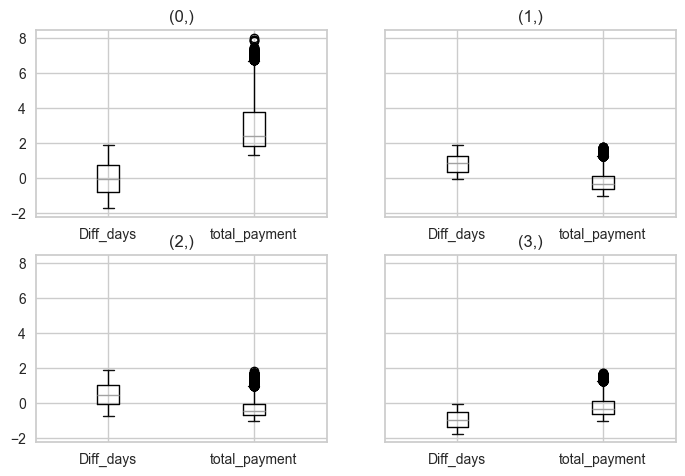

In [497]:
final_result.groupby(['Cluster'])[['Diff_days','total_payment']].boxplot()
plt.show()

1. 클러스터 중심 확인
클러스터의 중심(cluster centers)을 확인하고, 각 클러스터 중심의 주성분(PC1, PC2, ...) 값을 분석합니다.
중심값을 통해 클러스터가 데이터의 어떤 특징에 기반하여 나뉘었는지 파악할 수 있습니다.

In [83]:
cluster_centers = kmeans.cluster_centers_
print(pd.DataFrame(cluster_centers, columns=['PC1', 'PC2', 'PC3']))
#print(pd.DataFrame(cluster_centers, columns=['PC1', 'PC2', 'PC3', 'PC4']))
#print(pd.DataFrame(cluster_centers, columns=['PC1', 'PC2', 'PC3', 'PC4', 'PC5']))
#print(pd.DataFrame(cluster_centers, columns=['PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'PC6']))

        PC1       PC2       PC3
0 -0.614354 -0.836937 -0.180334
1  1.314695 -0.642456  3.002883
2  4.558987 -0.040474 -0.938926
3  1.503332  0.121609 -0.352615
4 -0.519536  0.887191  0.085184


2. 원본 데이터와의 매핑
PCA로 변환된 데이터는 원래 데이터의 특성을 압축한 것이므로, 원래 변수들과의 관계를 해석해야 합니다.
PCA의 components_를 활용하여 각 주성분(PC)이 원래 변수들에서 어떤 영향을 받았는지 확인합니다.

In [84]:
#pd.DataFrame(pca.components_, columns=final_result.columns, index=['PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'PC6']).T
#pd.DataFrame(pca.components_, columns=final_result.columns, index=['PC1', 'PC2', 'PC3', 'PC4', 'PC5']).T
#pd.DataFrame(pca.components_, columns=final_result.columns, index=['PC1', 'PC2', 'PC3', 'PC4']).T
pd.DataFrame(pca.components_, columns=final_result.columns, index=['PC1', 'PC2', 'PC3']).T

,PC1,PC2,PC3
Diff_days,0.052356,0.983700,0.170245
product_weight_g,0.651055,-0.008664,-0.242107
total_payment,0.409769,-0.174767,0.891970
volume,0.636121,0.040318,-0.339534
category_arts_hobbies,0.001008,0.000706,-0.005671
category_baby_products,0.002959,0.000099,-0.003538
category_construction,0.000027,-0.002814,-0.000494
category_electronics,-0.012696,0.000244,0.001837
category_fashion_beauty,-0.018706,-0.002050,0.023686
category_food,-0.000500,-0.000037,-0.000306


3. 클러스터별 분포 및 특성 비교
각 클러스터에 속한 데이터의 원래 변수 값들을 비교하여 어떤 특성이 클러스터를 나누는 데 기여했는지 분석합니다.

예를 들어, 특정 클러스터가 payment_type이 대부분 credit_card이고 Diff_days가 낮은 값을 가진다면, 해당 클러스터는 신용카드 사용 빈도가 높고 최근 구매가 많은 고객 그룹일 수 있습니다.



In [49]:
merged_with_labels = pd.concat([final_result, pd.DataFrame({'Cluster': labels})], axis=1)
cluster_summary = merged_with_labels.groupby('Cluster').mean()
print(cluster_summary)

         Diff_days  product_weight_g  total_payment    volume  \
Cluster                                                         
0         0.854209         -0.281509      -0.252503 -0.231432   
1         0.096152          2.466954       0.604060  2.219868   
2        -0.868284         -0.295393      -0.236974 -0.277755   
3        -0.020995          0.089034       3.175586 -0.008857   

         payment_type_credit_card  payment_type_credit_card/debit_card  \
Cluster                                                                  
0                        0.732592                             0.000000   
1                        0.774180                             0.000000   
2                        0.753831                             0.000032   
3                        0.838928                             0.000000   

         payment_type_credit_card/voucher  payment_type_debit_card  \
Cluster                                                              
0                       

5. 클러스터 해석 전략
비즈니스 관점 적용:
각 클러스터가 어떤 고객 그룹, 제품, 서비스와 연관되는지 기존 도메인 지식을 활용해 해석합니다.
원래 변수 확인:
각 클러스터에서 가장 높은 빈도를 차지하는 category, payment_type 등 범주형 변수들을 확인합니다.

In [50]:
print(merged_with_labels.columns)

Index(['Diff_days', 'product_weight_g', 'total_payment', 'volume',
       'payment_type_credit_card', 'payment_type_credit_card/debit_card',
       'payment_type_credit_card/voucher', 'payment_type_debit_card',
       'payment_type_voucher', 'payment_type_wallet', 'category_arts_hobbies',
       'category_baby_products', 'category_construction',
       'category_electronics', 'category_fashion_beauty', 'category_food',
       'category_furniture', 'category_home_appliances', 'category_industry',
       'category_others', 'category_security', 'category_toys', 'Cluster'],
      dtype='object')


In [51]:
# 'category'와 'payment_type'에 해당하는 컬럼 필터링
category_cols = [col for col in merged_with_labels.columns if col.startswith('category_')]
payment_type_cols = [col for col in merged_with_labels.columns if col.startswith('payment_type_')]

# 원하는 컬럼을 그룹화하여 대표 값을 계산 (mode 사용)
grouped_summary = merged_with_labels.groupby('Cluster')[category_cols + payment_type_cols].agg(pd.Series.mode)

print(grouped_summary)

         category_arts_hobbies  category_baby_products  category_construction  \
Cluster                                                                         
0                          0.0                     0.0                    0.0   
1                          0.0                     0.0                    0.0   
2                          0.0                     0.0                    0.0   
3                          0.0                     0.0                    0.0   

         category_electronics  category_fashion_beauty  category_food  \
Cluster                                                                 
0                         0.0                      0.0            0.0   
1                         0.0                      0.0            0.0   
2                         0.0                      0.0            0.0   
3                         0.0                      0.0            0.0   

         category_furniture  category_home_appliances  category_industry  